In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, recall_score, \
    precision_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
dataset = pd.read_csv('abwanderung.csv')
dataset.head()

,Id,CustomerId,Dauer,Transaktionsvolumen,Vertriebsweg,Reklamation,Kreditrating,Geschlecht,Alter,Versicherungstyp,Versicherungssumme,Gehalt,Wechsel
0,6517,15795246,lang,mittel,digital,nicht vorgefallen,628,Female,51.0,9,15590382,7115984,kein Wechsel
1,7117,15765257,durchschnittlich,gering,digital,nicht vorgefallen,564,Male,31.0,5,12146187,2043209,kein Wechsel
2,8360,15754747,lang,mittel,analog,nicht vorgefallen,686,Male,33.0,9,14191809,18403647,kein Wechsel
3,1761,15796313,kurz,mittel,digital,vorgefallen,662,Female,36.0,4,1669092,13887112,kein Wechsel
4,9195,15710315,lang,gering,analog,vorgefallen,529,Male,29.0,4,1357594,11281379,kein Wechsel


In [20]:
#Löschen der für die Datenanalyse unnötigen Spalten.
#Tragen Sie dazu die Spaltennamen mit Anführungszeichen getrennet durch Komma zwischen
#die rechteckigen Klammern ein (z.B 'Alter', 'Gehalt') um die Spalten Alter und Gehalt zu löschen
dataset = dataset.drop(columns=["Id", "CustomerId"])
dataset.head()


,Dauer,Transaktionsvolumen,Vertriebsweg,Reklamation,Kreditrating,Geschlecht,Alter,Versicherungstyp,Versicherungssumme,Gehalt,Wechsel
0,lang,mittel,digital,nicht vorgefallen,628,Female,51.0,9,15590382,7115984,kein Wechsel
1,durchschnittlich,gering,digital,nicht vorgefallen,564,Male,31.0,5,12146187,2043209,kein Wechsel
2,lang,mittel,analog,nicht vorgefallen,686,Male,33.0,9,14191809,18403647,kein Wechsel
3,kurz,mittel,digital,vorgefallen,662,Female,36.0,4,1669092,13887112,kein Wechsel
4,lang,gering,analog,vorgefallen,529,Male,29.0,4,1357594,11281379,kein Wechsel


In [21]:
dataset["Transaktionsvolumen"].unique()

array(['mittel', 'gering', 'hoch', 'sehr hoch'], dtype=object)

In [22]:


'''
Mit dem Encoder können Sie alle Spalten, die nicht-numerische Daten enhalten,
in numerische Daten umwandeln. Wären dies beispielsweise die Spalten Dauer
und Gehalt, müssten Sie anstelle des Platzhalters folgenden Text einfügen (inkl. Anführungszeichen):
'Dauer', 'Gehalt'. Machen Sie das zunächst für die Spalten mit nur zwei möglichen Werten.
'''

def encodeBinary(column):
    enc = OrdinalEncoder()
    enc.fit(dataset[[column]])
    dataset[[column]] = enc.transform(dataset[[column]])
    
encodeBinary("Vertriebsweg")
encodeBinary("Reklamation")
encodeBinary("Geschlecht")

dataset.head(5)

,Dauer,Transaktionsvolumen,Vertriebsweg,Reklamation,Kreditrating,Geschlecht,Alter,Versicherungstyp,Versicherungssumme,Gehalt,Wechsel
0,lang,mittel,1.0,0.0,628,0.0,51.0,9,15590382,7115984,kein Wechsel
1,durchschnittlich,gering,1.0,0.0,564,1.0,31.0,5,12146187,2043209,kein Wechsel
2,lang,mittel,0.0,0.0,686,1.0,33.0,9,14191809,18403647,kein Wechsel
3,kurz,mittel,1.0,1.0,662,0.0,36.0,4,1669092,13887112,kein Wechsel
4,lang,gering,0.0,1.0,529,1.0,29.0,4,1357594,11281379,kein Wechsel


In [23]:

'''
Für Spalten mit mehr als drei Werten, die man anordnen kann (z.B. die Dauer des Vertrag,
wo mathematisch gesehen gilt, dass lang > mittel > kurz), muss man dem Encoder, die
Reihenfolge manuell übergeben, da er ansonsten die Werte alphabetisch anordnet

'''
enc2=OrdinalEncoder(categories=[['kurz','durchschnittlich','lang'],['gering','mittel','hoch','sehr hoch']])
enc2.fit(dataset[['Dauer','Transaktionsvolumen']])
dataset[['Dauer','Transaktionsvolumen']]=enc2.transform(dataset[['Dauer','Transaktionsvolumen']])

dataset.head()

,Dauer,Transaktionsvolumen,Vertriebsweg,Reklamation,Kreditrating,Geschlecht,Alter,Versicherungstyp,Versicherungssumme,Gehalt,Wechsel
0,2.0,1.0,1.0,0.0,628,0.0,51.0,9,15590382,7115984,kein Wechsel
1,1.0,0.0,1.0,0.0,564,1.0,31.0,5,12146187,2043209,kein Wechsel
2,2.0,1.0,0.0,0.0,686,1.0,33.0,9,14191809,18403647,kein Wechsel
3,0.0,1.0,1.0,1.0,662,0.0,36.0,4,1669092,13887112,kein Wechsel
4,2.0,0.0,0.0,1.0,529,1.0,29.0,4,1357594,11281379,kein Wechsel


In [24]:
#Splitten der Daten in Trainings- und Testdaten. Tragen Sie dazu den Namen der Spalte, die der
#Entscheidungsbaum vorhersagen soll anstelle des Platzhalters ein.
#Fügen Sie zusätzlich in der letzten Zeile den Wert der test size ein, sodass 20% der Daten als
#Trainingsdaten verwenet werden

y = dataset['Wechsel']
X = dataset.drop(columns='Wechsel')
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,test_size=.2 , random_state=1)

[Text(0.5, 0.8333333333333334, 'Alter <= 41.5\nentropy = 0.976\nsamples = 3598\nvalue = [1473, 2125]\nclass = kein Wechsel'),
 Text(0.25, 0.5, 'Transaktionsvolumen <= 1.5\nentropy = 0.798\nsamples = 2136\nvalue = [516, 1620]\nclass = kein Wechsel'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.742\nsamples = 2043\nvalue = [430, 1613]\nclass = kein Wechsel'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.385\nsamples = 93\nvalue = [86, 7]\nclass = Wechsel'),
 Text(0.75, 0.5, 'Reklamation <= 0.5\nentropy = 0.93\nsamples = 1462\nvalue = [957, 505]\nclass = Wechsel'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.0\nsamples = 674\nvalue = [339, 335]\nclass = Wechsel'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.752\nsamples = 788\nvalue = [618, 170]\nclass = Wechsel')]

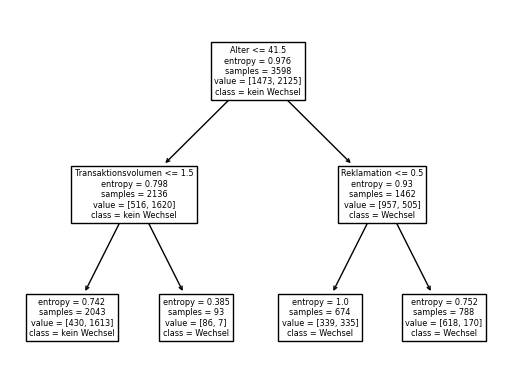

In [25]:
features = X.columns
class_names = ['Wechsel', 'kein Wechsel']
clf = DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=2)
clf.fit(X=X_train, y=y_train)
plot_tree(clf, feature_names=features, class_names=class_names)
#plt.savefig('./out.pdf')

[0.72333333 0.74       0.78333333 0.79444444 0.82555556 0.82777778
 0.79666667 0.80888889 0.79111111 0.77333333]


([<matplotlib.axis.XTick at 0x7febe6c09290>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

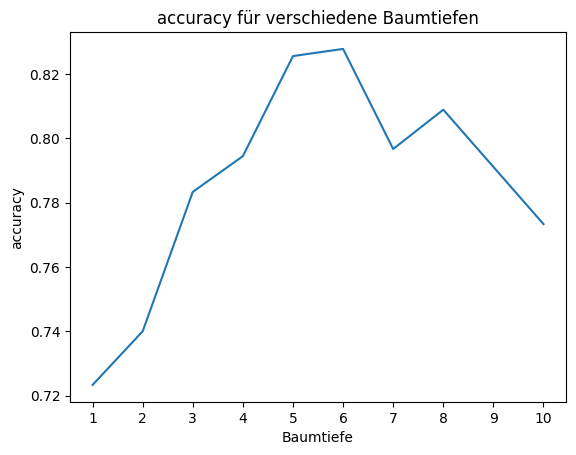

In [26]:
#plotten der accuracy für verschiedene Baumtiefen
acc_arr = np.zeros(10)
x = range(1, 11)
for i in range(1, 11):
    clf = DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=i)
    clf.fit(X=X_train, y=y_train)
    acc_arr[i-1] = clf.score(X=X_test, y=y_test)
#clf.score liefert dasselbe Ergebnis wie accuracy_score
plt.plot(x, acc_arr)
print(acc_arr)
plt.title('accuracy für verschiedene Baumtiefen')
plt.xlabel('Baumtiefe')
plt.ylabel('accuracy')
plt.xticks(x)

In [27]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=1, max_depth=6)
clf.fit(X=X_train, y=y_train)
y_pred = clf.predict(X = X_test)

In [33]:
acc = accuracy_score(y_true=y_test, y_pred=y_pred)
rec_wech = recall_score(y_true=y_test, y_pred=y_pred, pos_label='Wechsel')
prec_wech = precision_score(y_true=y_test, y_pred=y_pred, pos_label='Wechsel')
f1_wech = f1_score(y_true=y_test, y_pred=y_pred, pos_label='Wechsel')
rec_nowech = recall_score(y_true=y_test, y_pred=y_pred, pos_label='kein Wechsel')
prec_nowech = precision_score(y_true=y_test, y_pred=y_pred, pos_label='kein Wechsel')
f1_nowech = f1_score(y_true=y_test, y_pred=y_pred, pos_label='kein Wechsel')

In [34]:
print('Accuracy : ', acc)
print('Recall der Klasse \'Wechsel\' : ', rec_wech)
print('Precision der Klasse \'Wechsel\' : ', prec_wech)
print('F_1 Score der Klasse \'Wechsel\' : ', f1_wech)
print('Recall der Klasse \'kein Wechsel\' : ', rec_nowech)
print('Precision der Klasse \'kein Wechsel\' : ', prec_nowech)
print('F_1 Score der Klasse \'kein Wechsel\' : ', f1_nowech)

Accuracy :  0.8277777777777777
Recall der Klasse 'Wechsel' :  0.7463556851311953
Precision der Klasse 'Wechsel' :  0.7901234567901234
F_1 Score der Klasse 'Wechsel' :  0.767616191904048
Recall der Klasse 'kein Wechsel' :  0.8779174147217235
Precision der Klasse 'kein Wechsel' :  0.8489583333333334
F_1 Score der Klasse 'kein Wechsel' :  0.8631950573698147
